In [21]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Show plots inside the notebook
%matplotlib inline

In [22]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [23]:
# 🔎 Step 3: Explore the Data
print("Columns in the dataset:")
print(df.columns)

print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Columns in the dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinati

In [24]:
# 🧹 Step 4: Clean the Data
# Focus on 3 countries
countries = ["Kenya", "India", "United States"]
df = df[df["location"].isin(countries)]

# Convert date column
df["date"] = pd.to_datetime(df["date"])

# Drop rows with missing critical values
df = df.dropna(subset=["total_cases", "total_deaths", "total_vaccinations"])

# Fill in remaining missing values with 0
df = df.fillna(0)

df.head()

<ipython-input-24-091da173c1d4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173925,IND,Asia,India,2021-01-15,10450284.0,0.0,18045.57,150999.0,0.0,223.43,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173926,IND,Asia,India,2021-01-16,10450284.0,0.0,18045.57,150999.0,0.0,223.43,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173927,IND,Asia,India,2021-01-17,10557985.0,107701.0,15385.86,152274.0,1275.0,182.14,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173928,IND,Asia,India,2021-01-18,10557985.0,0.0,15385.86,152274.0,0.0,182.14,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0
173929,IND,Asia,India,2021-01-19,10557985.0,0.0,15385.86,152274.0,0.0,182.14,...,20.6,59.55,0.53,69.66,0.64,1417173120,0.0,0.0,0.0,0.0


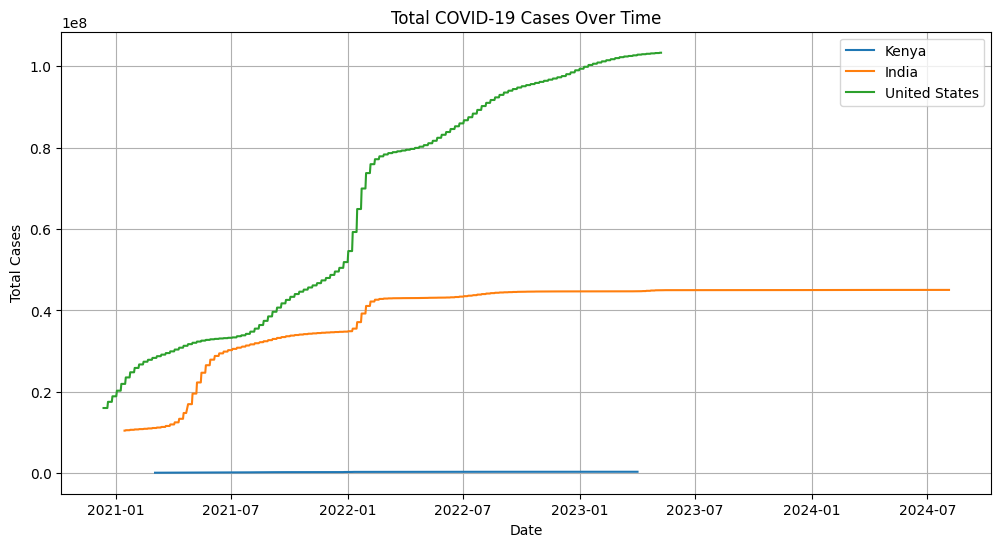

In [25]:
# 📈 Step 5: Plot Total Cases Over Time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

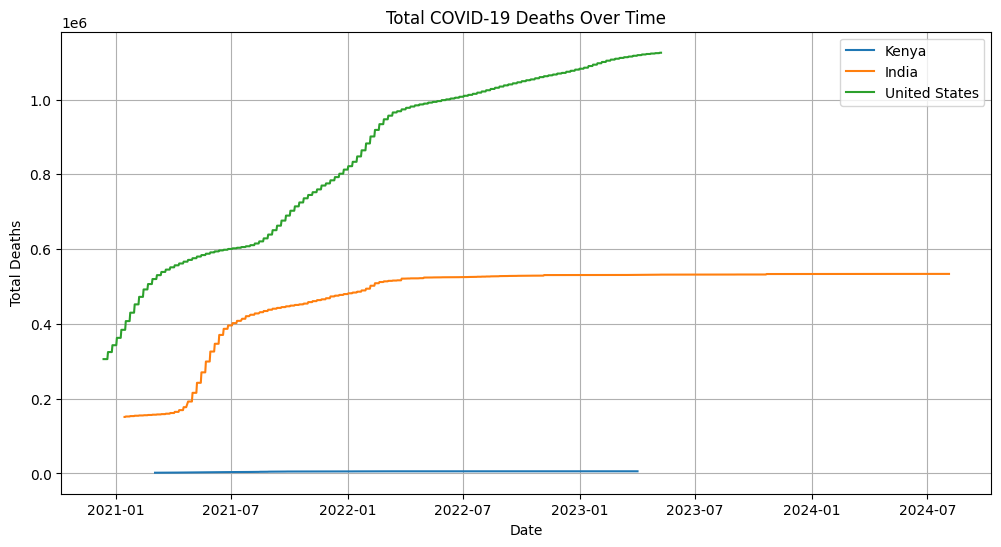

In [26]:
# 💀 Step 6: Plot Total Deaths Over Time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.show()

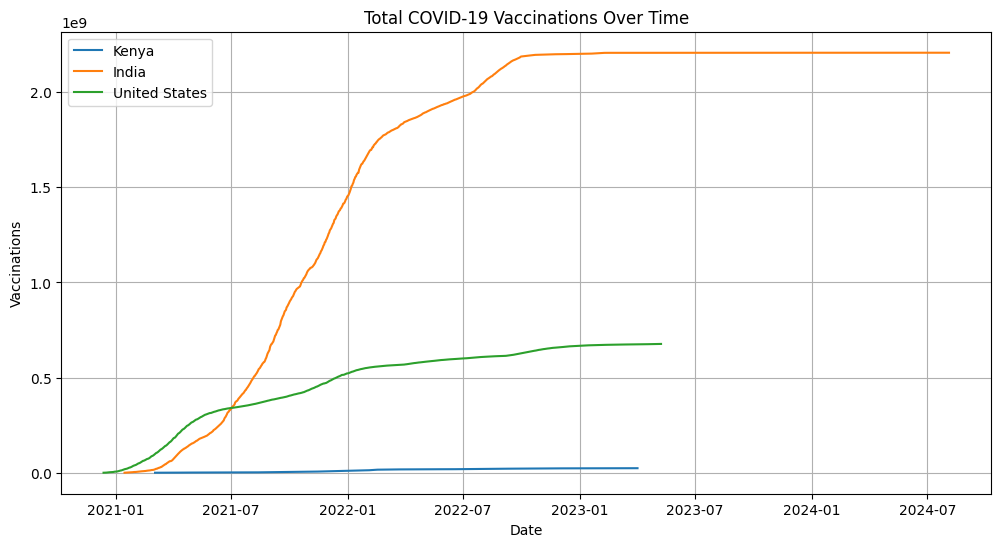

In [27]:
# 💉 Step 7: Plot Total Vaccinations Over Time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_vaccinations"], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# 🗺️ (Optional) Step 8: Choropleth Map - Total Cases by Country (Latest Date)
latest_date = df["date"].max()
latest_data = df[df["date"] == latest_date]

fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title=f"Total COVID-19 Cases by Country on {latest_date.date()}"
)
fig.show()

In [29]:
# 🧠 Step 9: Create a New Column for Death Rate
df["death_rate"] = df["total_deaths"] / df["total_cases"]
df[["location", "date", "total_cases", "total_deaths", "death_rate"]].tail()

,location,date,total_cases,total_deaths,death_rate
404667,United States,2023-05-05,103266404.0,1124063.0,0.010885
404668,United States,2023-05-06,103266404.0,1124063.0,0.010885
404669,United States,2023-05-07,103343569.0,1125209.0,0.010888
404670,United States,2023-05-08,103343569.0,1125209.0,0.010888
404671,United States,2023-05-09,103343569.0,1125209.0,0.010888


### Insights
- India had a major increase in cases in mid-2021, possibly due to the Delta variant.
- The USA led in vaccinations early on, but Kenya had a slower rollout.
- Death rate in Kenya was lower than expected, possibly due to a younger population.